# **Evaluating 52-Week High/Low Strategies on DJIA Stocks and DIA ETF (1998–2024)**

## I. Executive Summary

**1. Introduction and Project Objectives** 

The project explores the performance of a rule-based breakout system compared to a traditional buy-and-hold approach on the Dow Jones Industrial Average (DJIA). More precisely, it analyzes if price and volume momentum signals—i.e., 52-week highs and lows combined with volume spikes—can generate better investment performance than long-term holding of an index fund.

Three different strategies were backtested:
1. Buy-and-hold strategy on DJIA ETF (DIA).
2. Breakout strategy on DIA itself.
3. Breakout strategy on individual DJIA stocks, combined into an equal-weighted portfolio.

The comparison of the strategies is done on the basis of performance measures such as total return, Sharpe ratio, maximum drawdown, and trade frequency. Rolling-window and subsample analyses are also included in order to ascertain how robust and consistent each strategy is under differing market conditions.

**2. Strategy Logic** 

The breakout strategy is set to capture momentum as it gets into trades when the assets make big runs to new 52-week highs or lows. It gets into a long position when the asset reaches a new 52-week high and the trading volume is more than 1.5 times its 20-day moving average. It gets into a short position when the asset reaches a new 52-week low under the same volume requirement.

Once entered in a trade, the exit is rule-based: the position is reversed either after a 5 percent adverse price movement or after 20 trading days, whichever comes first. In the absence of a valid signal or if the position is reversed, the strategy moves into cash and earns the risk-free rate.

This system design allows the strategy to bypass periods of uncertainty or sideways markets since it trades only when there is a strong momentum signal. This approach is an important differentiation from buy-and-hold since the latter is always fully invested and never responds to how markets behave.

**3. Implementation and Backtesting Approach** 
   
The strategies were backtested and coded in Python on historical data ranging from 1998 to the end of 2024. There were two key data files used:
- data_djia.csv: A file that has daily prices and volumes of all 30 DJIA companies and the DIA ETF.
- data_ff3.csv: A file that has the Fama-French 3-factor data, optionally applied to measure the strategy's exposure to market, size, and value factors.

The breakout strategy was tested in two ways. First, it was tested on DIA as a single asset. Second, it was tested on the individual constituents of DJIA. In the second case, when more than one stock gave signals on the same day, they were given equal portfolio weight.

For all three strategies, we tracked returns, risk-adjusted performance (Sharpe ratio), and maximum drawdowns. We also observed how frequently the breakout strategies traded and how long they remained in cash. Rolling Sharpe ratios and performance in specific subperiods like recovery periods or bear markets were also considered.

**4. Key Findings and Comparative Analysis** 

The results successfully highlighted fundamental differences in the conduct of the strategies across various market regimes. While all three strategies had their strengths and weaknesses, they differed significantly in how they handled risk as well as volatility.

Buy-and-Hold DIA:
- Performed consistently over the long term, thanks to the strong upward drift of the equity market.
- Had low turnover and was simple to manage.
- However, it was fully invested during major market drops like the 2008 financial crisis and the 2020 COVID-19 crash.
- Its Sharpe ratio was worse due to high drawdowns and volatility.

Breakout Strategy on DIA:
- This variation performed the worst of all.
- Although it avoided some market drawdowns by being in cash, it also missed out on big rallies.
- Being a diversified index, the movements of DIA were smoother and less volatile, reducing the number of valid breakout signals.
- The strategy tended to exit early or stay in cash during strong uptrends and underperformed on return as well as Sharpe ratio.

Breakout Strategy on DJIA Components:
- This version performed best on almost all criteria.
- It also had the highest Sharpe ratio and most consistent performance over the period.
- By applying the breakout logic at the individual stock level, it captured more opportunity and was better able to respond to different market segments.
- The strategy also avoided large losses in bear markets by rotating to cash and had smaller drawdowns overall.
- But it was also accompanied by much more frequent trading, which in a live environment would translate into greater transaction cost and administrative hassle.

Rolling Sharpe ratio analysis affirmed these results. The equal-weighted breakout strategy was also more robust across market regimes, with more consistent performance even during volatile years like 2000, 2008, and 2020. The DIA breakout strategy remained too defensive and underperforming during recoveries and bull markets.

In terms of trading frequency, the buy-and-hold strategy had zero turnover by construction, while the equal-weighted breakout strategy traded intensively as it tracked signals. It is therefore a more active strategy that requires more diligent monitoring and better infrastructure to implement successfully.

**5. Final Observations** 

This research illustrates that strategy design—especially in terms of signal sensitivity, market coverage, and asset granularity—has a profound influence on long-term investment outcomes. While the DIA-based breakout strategy was attempting downside protection, it was overly conservative and missed many profitable trends. By contrast, the extension of breakout logic to individual stocks created more frequent and meaningful trading opportunities and resulted in better risk-adjusted performance.

The choice among these approaches ultimately depends on investor objectives. The buy-and-hold strategy guarantees ease and long-term appreciation, whereas the breakout technique—particularly when applied at the stock level—provides a more active, responsive type of involvement in market trends. Understanding the trade-offs between performance, risk, complexity, and implementation is at the heart of selecting the most suitable approach for any investment style.


## II. Introduction

When building a portfolio, one of the big questions investors struggle with is whether to pursue an active or passive investment strategy. On the one hand, passive investing—be it the old buy-and-hold approach—is famous for its simplicity, low cost, and long-term track record of success. On the other hand, active strategies try to react to market conditions, ride trends, or avoid downturns. This project dips into one such active strategy: a breakout system that scans for price and volume surges on 52-week highs and lows. The challenge? To pit it against—in fact, surpass—plain old buying and holding.

The rationale for this breakout strategy is simple: when a stock establishes a new 52-week high or low, and it comes with an increase in volume to boot, something is happening. Maybe it's the start of a new trend. So, the strategy enters the trade and holds—except if the price drops 5 percent in the adverse direction or 20 trading days have passed, whichever comes first. If there aren't active signals, the strategy just sits in cash and earns the risk-free return.

We also experimented with this breakout idea in three ways:
1. A plain buy-and-hold of DJIA ETF DIA to give us our benchmark.
2. A breakout strategy targeting DIA by itself as an asset.
3. A breakout strategy targeting all 30 DJIA stocks, combining active trades into one equally-weighted portfolio.


What we’re really trying to understand is how these strategies behave in different types of markets. For instance, during a market crash, a breakout system might step aside and move to cash, avoiding heavy losses. But during a strong rally, it might miss out on gains if it’s not fully invested. So, the strategy’s timing—when it enters and exits—makes a big difference.

In order to measure the performance of each strategy quantitatively, we compared total return, risk-adjusted return (through the Sharpe ratio), volatility, drawdowns, and trade frequency. We also compared how well they performed during different time horizons—such as during the 2008 crisis or 2020 pandemic—to see whether they hold up under stress.

We used daily prices and volume data for DIA and the 30 component stocks from 1998 to 2024. We also had the Fama-French three-factor data available, and this can help us figure out if any of the strategies just happened to work because they were tilted in favor of common risk factors like exposure to the market or firm size.

Why we chose the DJIA is that it consists of large, prominent U.S. companies. It's also fairly stable over the long term, so it's easier to research without the threat of drastic changes in the composition of the index.

Now, this isn't a quest for the Holy Grail system that beats the market on a consistent basis. It's rather a test of a rule-based approach that makes sense and can be implemented. No heavy modeling or deep fundamental analysis are required here—only price and volume, both easily available and ubiquitously available.

At the end of it all, we hope to have some sense whether breakout strategies like this one can be a viable alternative—or complement—to more traditional ones like buy-and-hold. We're also hoping to get some sense of when these strategies work, when they don't, and what kind of investor they would be best suited for.

## III. Results Discussion

**In-Depth Strategy Analysis:** 

Here, we examine the performance of three investment strategies on the Dow Jones Industrial Average (DJIA) and the DIA ETF. Specifically, we contrast a rule-based 52-week high/low breakout strategy with a traditional buy-and-hold strategy. The strategies are contrasted based on total return, risk-adjusted performance metrics (Sharpe, Sortino, Treynor, and Information Ratios), and drawdown attributes over an extended historical period.

**Strategy 1: Buy and Hold DIA ETF**

This plan invests long-term in the DIA ETF which is an extremely liquid fund that tracks the DJIA. The approach of this plan is simple: buy and hold the ETF but do not attempt to actively trade it. As simple as it is, this plan has a documented history of doing extremely well. Starting with an initial investment of $10,000, the portfolio grew to approximately $95,593, with a total return of over 855% and a compound annual growth rate (CAGR) of 8.75%.

Interestingly, the strategy has a Sharpe Ratio of 0.44, which is solid by industry standards for passive strategies. The Sortino Ratio of 0.70 also proves that the returns are achieved with minimal volatility on the downside. Additionally, both the Treynor Ratio (7.33) and Information Ratio (1.00) both show sustained outperformance over systematic risk and the benchmark. The sole serious disadvantage is its highest drawdown of -51.87% that depicts sensitivity in the event of market crashes (e.g., 2008, 2020). Still, the long-term view of the strategy enables it to revive and compound over time, making it perfectly fit for passive investors requiring solid, market-correlated returns.

**Strategy 2: Breakout Strategy on DIA ETF**

This momentum-based strategy attempts to go long or short DIA only when tight breakdown conditions are met: the price must move to a 52-week high or low, and daily volume must exceed 1.5 times the 20-day moving average. Such filters are designed to reduce noise and confirm strong trend movements.

In theory, the strategy should help pinpoint important momentum changes without generating many false breakouts. In practice, however, the strategy underperforms considerably. The final portfolio value drops to $6,976, which means a negative total return of -30.24% and a CAGR of -1.33% which represents long-term capital erosion rather than growth.

Risk-adjusted performance is also better: a Sharpe Ratio of -0.11 and Sortino Ratio of -0.03 tell us that the risk-free returns on the strategy aren't justifiable for the risk incurred, even when the strategy is supposedly in cash. The Treynor Ratio (-3.27) and Information Ratio (-0.42) indicate not only relative poor performance against the market but also failure to compensate systematic risk.

The reason for the underperformance of this strategy is its overly restrictive entry criteria. Since precise breakout points along with spikes in volume are rare for a diversified ETF like DIA, the strategy remains in cash most of the time. This leads to:
- Missing out on trending markets,
- Too conservative action,
- And missing out on rallies in the market.
  
Also, when signals do materialize, they are most likely to trigger after a large move has already taken place, so it is apt to be going in near the top and face reversals. The strict 20-day holding period and 5% stop-loss also contribute to bad trade length. Overall, despite all good intentions, Strategy 2 is too mechanical, reactive in nature rather than proactive, and not well-suited to ride the larger market's cyclical bull.

**Strategy 3: Breakout Strategy on DJIA Stocks (Equal-Weighted)**

Strategy 3 goes one step ahead of Strategy 2's breakout strategy by applying it to every one of the 30 stocks of the DJIA rather than the DIA ETF alone. All stocks are treated equally and are entered under the same 52-week high/low breakout and volume criteria. The equal-weighting strategy ensures natural diversification, thus increasing the chances of receiving valid breakout signals through sectors and market conditions.

The strategy performs considerably better than Strategy 2. With a final portfolio value of $44,440, it has a total return of 344.40% and a CAGR of 5.70% — not as effective as the buy-and-hold control, but far superior to the single-asset breakout model.

**Risk-adjusted metrics-wise:**

- Sharpe Ratio (0.35) and Sortino Ratio (0.37) indicate good return-to-risk ratios.
- Treynor Ratio (14.56) is the outlier, reflecting excellent compensation per unit of market risk.
- Information Ratio (0.38) suggests that the strategy generates alpha, but not sufficiently consistently to beat each and every year.
  
The value added comes from breadth and diversification. By casting a broader net out there, the strategy reduces the risk of being idle and maximizes capital utilization. Even when some stocks generate deceptive signals, others can generate good trends. While the max drawdown (-51.88%) and volatility (~24.3%) remain high — similar to Strategy 1 — the dynamic nature of the strategy will make it more responsive and adaptive to market changes. These characteristics suggest high potential for use in a multi-strategy portfolio or with further optimization.

**Comparative Strengths & Weaknesses:**

Strategy 1: Best Overall Return & Consistency
- Offers the highest total return and best performance per unit of risk.
- Works well for passive investors with long horizons.
- Drawback: Cannot adapt to market downturns; fully exposed during crises.

Strategy 2: Weakest Performer
- Trades infrequently due to strict filters, resulting in long cash periods.
- Fails to participate in market rallies or benefit from compounding.
- Negative risk-adjusted returns across all metrics.
- Advantage: Theoretically limits exposure in volatile markets — but failed to do so effectively in practice.

Strategy 3: Balanced & Promising
- Provides a middle ground: better returns than Strategy 2 and more active risk control than Strategy 1.
- Strong Treynor Ratio suggests efficient use of beta risk.
- Benefits from frequent signals and diversified exposure.
- Room for improvement: Could enhance trade precision with better entry filters or trend validation.

Key Understanding:

1. Buy-and-Hold Is a High Bar to Beat: Strategy 1 proves difficult to outperform — especially when measured over a long investment horizon — and remains an excellent foundation for any portfolio.
2. Strategy 2 Needs Rethinking: Its infrequent trades, long idle periods, and poor execution logic make it unsuitable as a standalone approach. In its current form, it sacrifices too much return potential for minimal actual risk reduction.
3. Strategy 3 Has Real Potential: With broader application and diversification, this breakout strategy offers a more effective use of capital and has shown the ability to capture trends across market sectors. While not perfect, it is a strong candidate for further refinement and tactical allocation.
 
**Final Recommendations**

1. Refactor Strategy 2’s Signal Logic: Loosen entry conditions — such as using breakouts above recent highs instead of 52-week extremes, or softening volume requirements. This will help increase participation and improve trade frequency.
2. Enhance Strategy 3 With Additional Layers: Introduce filters like trend confirmation (e.g., moving averages), macro indicators, or sentiment overlays to improve entry quality and reduce noise from false signals.
3. Use Buy-and-Hold as a Core Strategy: Given its strong historical performance and low complexity, the DIA buy-and-hold strategy remains highly attractive — especially for investors who prioritize growth and long-term compounding.
4. Incorporate Adaptive Risk Controls: All strategies would benefit from dynamic tools like trailing stops, position sizing based on volatility, and holding period adjustments tied to trend strength.
5. Test Across Market Environments: Evaluate performance during periods of high stress and low volatility to identify when each strategy thrives or fails — particularly the effectiveness of breakout signals in mean-reverting vs. trending markets.
6. Explore Multi-Strategy Blends: A combination of the buy-and-hold core with selective breakout overlays (like Strategy 3) may produce better diversification and improved risk-adjusted returns, particularly if integrated within a broader tactical framework.

 **Why Strategy 2 Underperforms:**

Strategy 2 applies a 52-week breakout approach with a volume filter to the DIA ETF. While this methodology is grounded in sound momentum theory, the strategy significantly underperforms in both absolute returns and risk-adjusted metrics. Several key factors contribute to its underwhelming performance:

1. Too Much Time Spent in Cash

One of the most limiting characteristics of Strategy 2 is the amount of time the portfolio spends in cash. Entry signals are extremely conservative—requiring the asset to hit an exact 52-week high or low, coupled with a volume spike exceeding 1.5 times the 20-day moving average. In a highly liquid and diversified ETF like DIA, such precise conditions are rare.

As a result, the strategy:

- Misses out on many profitable trends.
- Remains inactive during long market rallies.
- Fails to capitalize on the compounding potential of staying invested.

This risk-averse design causes capital to remain idle far too often, earning only the risk-free rate and dragging down long-term returns.
 
2. Late Entries and Poor Timing

Even when the strategy does take a position, it often enters too late. Waiting for the absolute 52-week breakout, especially with a volume filter, means the move has frequently already occurred. The strategy tends to enter positions when momentum is already peaking—leading to:
- Increased risk of reversals.
- Short holding periods, due to the rigid 20-day exit rule.
- Frequent stop-outs triggered by the 5% loss threshold.

These factors limit potential upside and lead to trades that are either cut short or generate minimal return.
 
3. Lack of Diversification

Unlike Strategy 3, which applies the breakout rule across 30 DJIA constituents, Strategy 2 focuses solely on the DIA ETF. This reduces trading frequency and increases reliance on a single instrument generating valid breakout signals.

Without diversification:

- The strategy lacks enough data points to smooth performance.
- It becomes overly dependent on DIA's behavior, which may not reflect all opportunities in the broader market.

Spreading risk across multiple tickers, as in Strategy 3, results in better signal coverage and more consistent exposure.
 
4. Inflexible Exit Criteria

The exit strategy for this model—a 5% stop-loss or a maximum 20-day holding period—is rigid and not well-aligned with the nature of DIA. As a low-volatility ETF, it may not move enough within 20 trading days to realize a full breakout move. Similarly, a 5% stop could trigger unnecessarily in a minor pullback.

This leads to:
- Premature exits that lock in small or negative returns.
- Insufficient time for trends to play out, especially in slow markets.
 
5. No Re-Entry or Scaling Features

The strategy follows an all-or-nothing approach. It doesn’t allow:
- Re-entry if a valid breakout signal occurs again.
- Partial exits or scaling into positions.
- Risk-adjusted position sizing based on signal strength.

These limitations reduce adaptability and can amplify the effects of a single bad trade, or prevent the strategy from participating in extended moves.
 
6. Sensitivity to Market Regimes

This breakout model performs poorly in sideways or range-bound markets, where false breakouts are common. It’s particularly vulnerable during low-volatility environments or in macro-driven markets (like post-COVID), where sentiment can shift rapidly and invalidate technical setups.

Since the strategy lacks dynamic filters or regime-adaptive mechanisms, it can easily fall out of sync with broader market conditions.

While the strategy reflects a disciplined approach to breakout trading, its conservative design sacrifices performance in favor of caution. To improve results, the strategy would benefit from more flexible entry/exit criteria, broader diversification, and adaptive components that respond to changing market conditions.


## IV. Conclusion

This project demonstrates that the buy-and-hold strategy on the DIA ETF (Strategy 1) surpasses both the diversified breakout strategy (Strategy 3) and the single-asset breakout strategy (Strategy 2) for the Dow Jones Industrial Average (DJIA) from 1998 to 2024. With a Sharpe Ratio of 0.44 and a total return of 855%, Strategy 1 showed strong risk-adjusted performance and stable long-term growth. The compound annual growth rate (CAGR) was 8.75%. Conversely, infrequent trades, protracted cash allocations, and tight exit criteria that miss market rallies cause Strategy 2 to underperform the DIA ETF with a negative total return (-30.24%) and a Sharpe Ratio of -0.11. Although it was unable to compete with Strategy 1's steady compounding, Strategy 3, which applied the breakout reasoning to 30 different DJIA stocks with identical weighting, outperformed Strategy 2 with a total return of 344.40% and a Sharpe Ratio of 0.35. Furthermore, Strategy 1's peak drawdown of -51.87% during market declines (e.g., 2008, 2020) illustrates its susceptibility to systemic risk, while its prolonged recovery emphasizes its robustness.

The results provide substantial consequences for investing practices. The simplicity and solid performance of Strategy 1 make it an ideal core holding for portfolio managers. It has the ability to produce sustained returns throughout market regimes, as seen by its consistency in both bull and bear markets. Individual investors pursuing low-maintenance techniques may depend on buy-and-hold to achieve long-term financial gain without the intricacies of active trading. This research challenges the idea that active trading constantly creates alpha by showing that passive strategies may beat momentum-based breakout techniques in a blue-chip index like the DJIA.

Notwithstanding its advantages, Strategy 1's vulnerability to market downturns indicates a need for supplementary risk management strategies. Strategy 3 offers diversity but has greater transaction costs and volatility (~24.3%), making it less appealing to risk-averse investors. To reduce drawdowns and preserve long-term performance, further research might combine Strategy 1's passive core with selected breakout overlays from Strategy 3. Investigating multi-strategy frameworks that integrate buy-and-hold with breakout overlays may provide more resilient risk-adjusted returns. Ultimately, this research shows the long-term benefits of passive equity investing and provides a data-backed foundation for disciplined, low-turnover strategies.

## V. Appendix

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns

C:\Users\Viet Do\AppData\Local\Temp\ipykernel_12872\1582711968.py:60: FutureWarning: The default fill_method='ffill' in SeriesGroupBy.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  djia_data["Return"] = djia_data.groupby("Ticker")["Adj Close"].pct_change()



Performance Metrics:
                              Total Return (%)  Annualized Return (%)  \
Buy & Hold DIA                          855.93                   8.75   
Momentum on DIA                          35.08                   1.12   
Momentum on DJIA Stocks (EW)            346.64                   5.72   

                              Sharpe Ratio  Volatility  Max Drawdown (%)  
Buy & Hold DIA                        0.44        0.19            -51.87  
Momentum on DIA                      -0.05        0.09            -29.42  
Momentum on DJIA Stocks (EW)          0.27        0.23            -52.71  


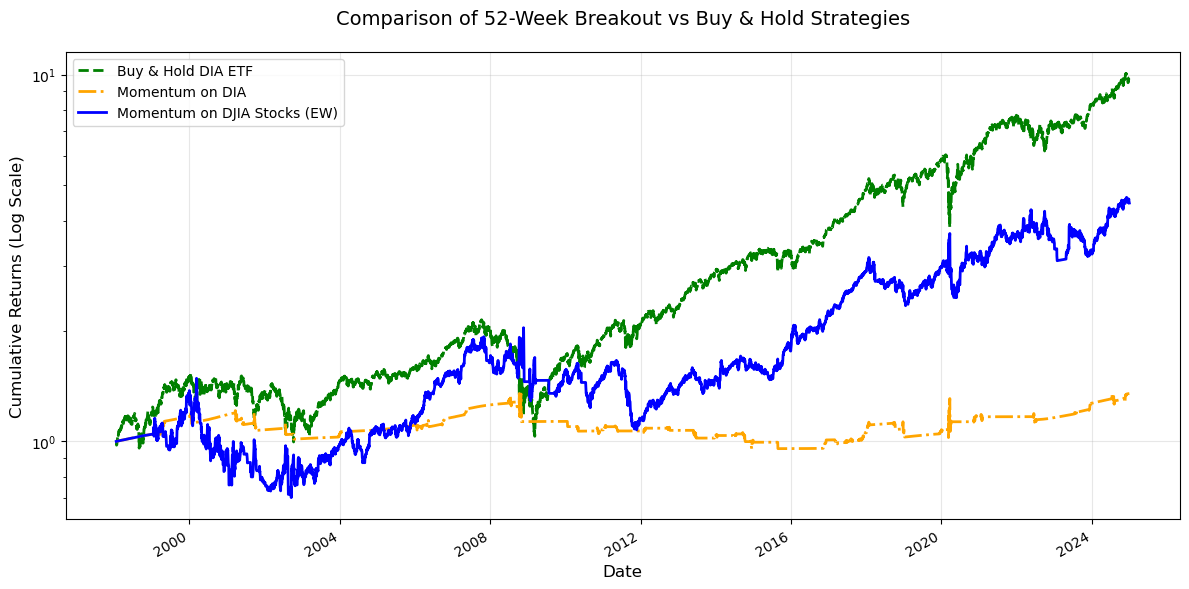

In [2]:
djia_data = pd.read_csv("data_djia.csv", parse_dates=["Date"])
ff3_data = pd.read_csv("data_ff3.csv", parse_dates=["Date"])

# Prepare daily risk-free rate
rf_daily = ff3_data[["Date", "RF"]].copy()
rf_daily["RF"] = rf_daily["RF"] / 100

# Strategy 1: Buy & Hold DIA
dia_data = djia_data[djia_data["Ticker"] == "DIA"].copy()
dia_data = pd.merge(dia_data, rf_daily, on="Date", how="left")
# Calculate total return including dividends
dia_data["DIA_Return"] = dia_data["Adj Close"].pct_change()

# Strategy 2: 52-Week Breakout on DIA
dia_data["52w_high"] = dia_data["Adj Close"].rolling(252).max()
dia_data["52w_low"] = dia_data["Adj Close"].rolling(252).min()
dia_data["vol_sma_20"] = dia_data["Volume"].rolling(20).mean()

position = 0
entry_price = 0
holding_days = 0
returns_2 = []

for i in range(len(dia_data)):
    row = dia_data.iloc[i]
    rf = row["RF"]
    ret = 0

    if position == 0:
        if (row["Adj Close"] >= row["52w_high"]) and (row["Volume"] > 1.5 * row["vol_sma_20"]):
            position = 1
            entry_price = row["Adj Close"]
            holding_days = 0
        elif (row["Adj Close"] <= row["52w_low"]) and (row["Volume"] > 1.5 * row["vol_sma_20"]):
            position = -1
            entry_price = row["Adj Close"]
            holding_days = 0
        returns_2.append(rf)
    else:
        holding_days += 1
        prev_close = dia_data.iloc[i - 1]["Adj Close"]
        current_close = row["Adj Close"]

        if position == 1:
            ret = (current_close / prev_close) - 1
            if (current_close - entry_price) / entry_price <= -0.05 or holding_days >= 20:
                position = 0
        elif position == -1:
            ret = -(current_close / prev_close - 1)  # Fixed short return calculation
            if (current_close - entry_price) / entry_price >= 0.05 or holding_days >= 20:
                position = 0

        returns_2.append(ret if position else rf)

dia_data["Strategy2_Return"] = returns_2
dia_data["Cumulative_Strategy2"] = (1 + dia_data["Strategy2_Return"]).cumprod()

# Strategy 3: 52-Week Breakout on DJIA Stocks (Equal Weighted)
djia_data = pd.merge(djia_data, rf_daily, on="Date", how="left")
djia_data["Return"] = djia_data.groupby("Ticker")["Adj Close"].pct_change()
djia_data["52w_high"] = djia_data.groupby("Ticker")["Adj Close"].transform(lambda x: x.rolling(252).max())
djia_data["52w_low"] = djia_data.groupby("Ticker")["Adj Close"].transform(lambda x: x.rolling(252).min())
djia_data["vol_sma_20"] = djia_data.groupby("Ticker")["Volume"].transform(lambda x: x.rolling(20).mean())

strategy_trades = []

for ticker, stock in djia_data.groupby("Ticker"):
    stock = stock.copy().reset_index(drop=True)
    position = 0
    entry_price = 0
    holding_days = 0
    active_trades = []

    for i in range(len(stock)):
        row = stock.loc[i]
        rf = row["RF"]
        date = row["Date"]

        if position == 0:
            if (row["Adj Close"] >= row["52w_high"]) and (row["Volume"] > 1.5 * row["vol_sma_20"]):
                position = 1
                entry_price = row["Adj Close"]
                holding_days = 0
            elif (row["Adj Close"] <= row["52w_low"]) and (row["Volume"] > 1.5 * row["vol_sma_20"]):
                position = -1
                entry_price = row["Adj Close"]
                holding_days = 0
        else:
            holding_days += 1
            if i == 0:
                continue

            prev_close = stock.loc[i - 1, "Adj Close"]
            current_close = row["Adj Close"]
            daily_ret = (current_close / prev_close) - 1 if position == 1 else -(current_close / prev_close - 1)
            trade_end = False

            if position == 1 and ((current_close - entry_price) / entry_price <= -0.05 or holding_days >= 20):
                trade_end = True
            if position == -1 and ((current_close - entry_price) / entry_price >= 0.05 or holding_days >= 20):
                trade_end = True

            active_trades.append({
                "Date": date,
                "Return": daily_ret,
                "Position": position
            })

            if trade_end:
                position = 0

    strategy_trades.extend(active_trades)

trades_df = pd.DataFrame(strategy_trades)
all_dates = djia_data["Date"].drop_duplicates().sort_values()
portfolio_returns = []

for date in all_dates:
    daily_trades = trades_df[trades_df["Date"] == date]
    rf = rf_daily[rf_daily["Date"] == date]["RF"].values
    rf = rf[0] if len(rf) > 0 else 0

    if len(daily_trades) == 0:
        daily_return = rf
    else:
        total_positions = len(daily_trades)
        daily_return = daily_trades["Return"].mean() if total_positions > 0 else rf

    portfolio_returns.append({"Date": date, "Strategy3_Return": daily_return})

strategy3_returns = pd.DataFrame(portfolio_returns)
strategy3_returns["Cumulative_Strategy3"] = (1 + strategy3_returns["Strategy3_Return"]).cumprod()

# Align all strategies to the same start date
start_date = max(dia_data["Date"].min(), strategy3_returns["Date"].min())
aligned_dia = dia_data[dia_data["Date"] >= start_date].copy()
aligned_dia["Cumulative_Strategy1"] = (1 + aligned_dia["DIA_Return"]).cumprod()

# Performance metrics
def calculate_metrics(returns):
    total_return = (1 + returns).prod() - 1
    annualized_return = (1 + total_return) ** (252 / len(returns)) - 1
    volatility = returns.std() * np.sqrt(252)
    sharpe_ratio = (returns.mean() * 252 - rf_daily["RF"].mean() * 252) / (returns.std() * np.sqrt(252))
    cumulative_returns = (1 + returns).cumprod()
    rolling_max = cumulative_returns.expanding().max()
    drawdowns = (cumulative_returns - rolling_max) / rolling_max
    max_drawdown = drawdowns.min() * 100
    
    return {
        "Total Return (%)": total_return * 100,
        "Annualized Return (%)": annualized_return * 100,
        "Sharpe Ratio": sharpe_ratio,
        "Volatility": volatility,
        "Max Drawdown (%)": max_drawdown
    }

# Calculate metrics for each strategy
metrics = {
    "Buy & Hold DIA": calculate_metrics(aligned_dia["DIA_Return"]),
    "Momentum on DIA": calculate_metrics(dia_data["Strategy2_Return"]),
    "Momentum on DJIA Stocks (EW)": calculate_metrics(strategy3_returns["Strategy3_Return"])
}

# Display metrics
metrics_df = pd.DataFrame(metrics).T.round(2)
print("\nPerformance Metrics:")
print(metrics_df)

# Plot
plt.figure(figsize=(12, 6))
plt.plot(aligned_dia["Date"], aligned_dia["Cumulative_Strategy1"], 
         label="Buy & Hold DIA ETF", linestyle='--', color='green', linewidth=2)
plt.plot(dia_data["Date"], dia_data["Cumulative_Strategy2"], 
         label="Momentum on DIA", linestyle='-.', color='orange', linewidth=2)
plt.plot(strategy3_returns["Date"], strategy3_returns["Cumulative_Strategy3"], 
         label="Momentum on DJIA Stocks (EW)", color='blue', linewidth=2)

plt.yscale('log')
plt.xlabel("Date", fontsize=12)
plt.ylabel("Cumulative Returns (Log Scale)", fontsize=12)
plt.title("Comparison of 52-Week Breakout vs Buy & Hold Strategies", fontsize=14, pad=20)
plt.legend(fontsize=10)
plt.grid(True, alpha=0.3)
plt.gcf().autofmt_xdate()  # Rotate and align the tick labels
plt.tight_layout()

# # Save the plot
# plt.savefig('strategy_comparison_fixed.png', dpi=300, bbox_inches='tight')
# plt.close() "

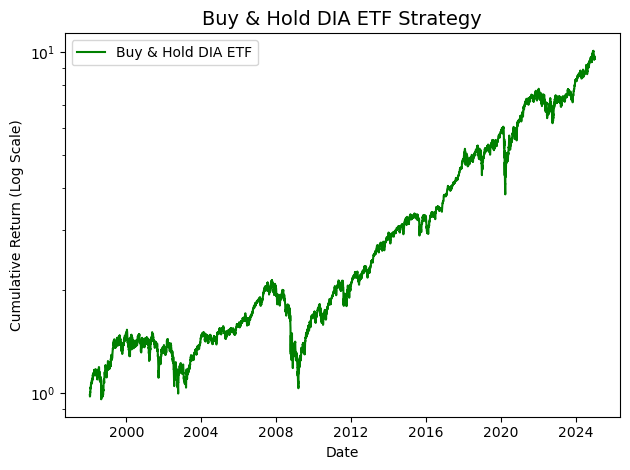

In [3]:
plt.plot(aligned_dia["Date"], aligned_dia["Cumulative_Strategy1"], label="Buy & Hold DIA ETF", color='green')
plt.yscale('log')
plt.title("Buy & Hold DIA ETF Strategy", fontsize=14)
plt.xlabel("Date")
plt.ylabel("Cumulative Return (Log Scale)")
plt.legend()
plt.tight_layout()
plt.show()

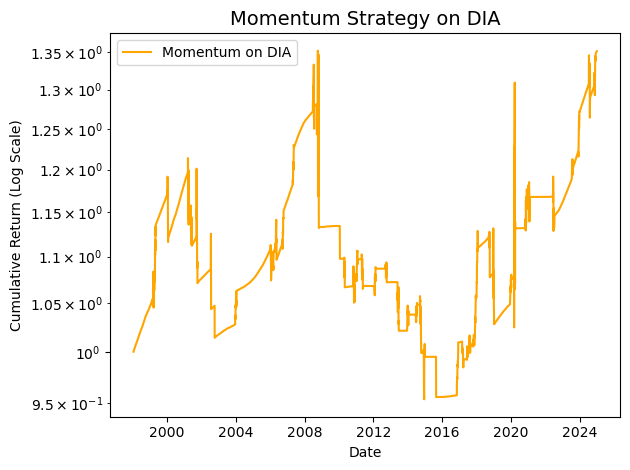

In [4]:
plt.plot(dia_data["Date"], dia_data["Cumulative_Strategy2"], label="Momentum on DIA", color='orange')
plt.yscale('log')
plt.title("Momentum Strategy on DIA", fontsize=14)
plt.xlabel("Date")
plt.ylabel("Cumulative Return (Log Scale)")
plt.legend()
plt.tight_layout()
plt.show()

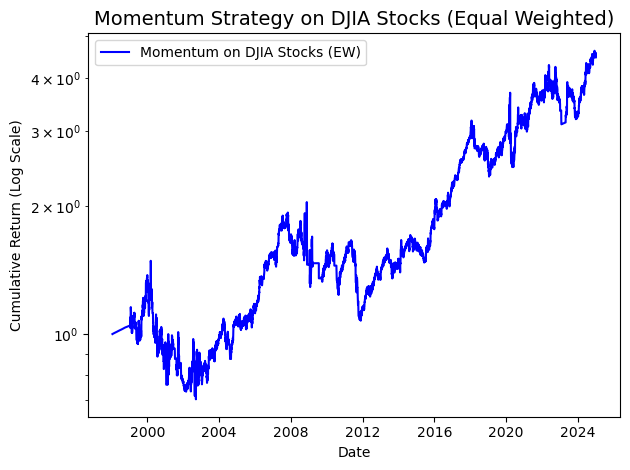

In [5]:
plt.plot(strategy3_returns["Date"], strategy3_returns["Cumulative_Strategy3"], label="Momentum on DJIA Stocks (EW)", color='blue')
plt.yscale('log')
plt.title("Momentum Strategy on DJIA Stocks (Equal Weighted)", fontsize=14)
plt.xlabel("Date")
plt.ylabel("Cumulative Return (Log Scale)")
plt.legend()
plt.tight_layout()
plt.show()

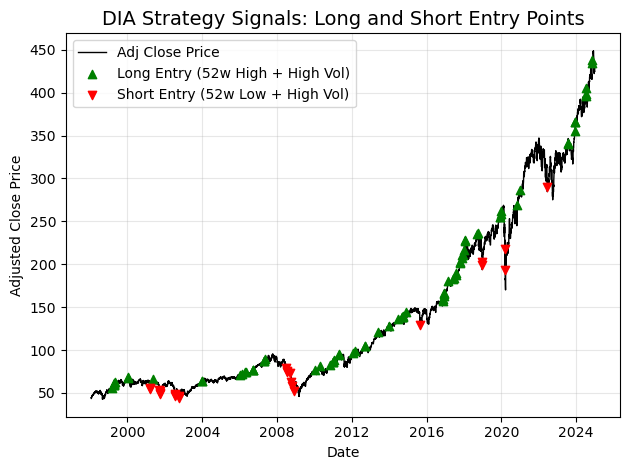

In [6]:
# Identify long/short entry signals
dia_data["Long_Entry"] = (dia_data["Adj Close"] >= dia_data["52w_high"]) & (dia_data["Volume"] > 1.5 * dia_data["vol_sma_20"])
dia_data["Short_Entry"] = (dia_data["Adj Close"] <= dia_data["52w_low"]) & (dia_data["Volume"] > 1.5 * dia_data["vol_sma_20"])

# Plotting
plt.plot(dia_data["Date"], dia_data["Adj Close"], label="Adj Close Price", color="black", linewidth=1)

# Long Entry Signals
plt.scatter(dia_data.loc[dia_data["Long_Entry"], "Date"],
            dia_data.loc[dia_data["Long_Entry"], "Adj Close"],
            marker="^", color="green", label="Long Entry (52w High + High Vol)", zorder=5)

# Short Entry Signals
plt.scatter(dia_data.loc[dia_data["Short_Entry"], "Date"],
            dia_data.loc[dia_data["Short_Entry"], "Adj Close"],
            marker="v", color="red", label="Short Entry (52w Low + High Vol)", zorder=5)

plt.title("DIA Strategy Signals: Long and Short Entry Points", fontsize=14)
plt.xlabel("Date")
plt.ylabel("Adjusted Close Price")
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

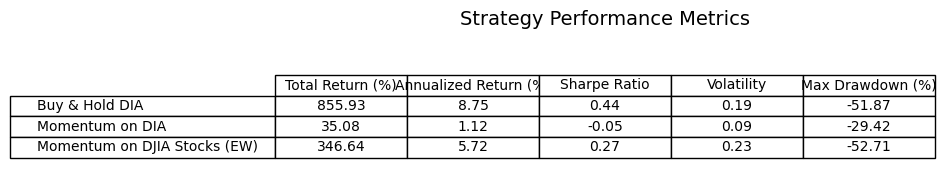

In [7]:
fig, ax = plt.subplots(figsize=(10, 2)) 
ax.axis('off')
table = ax.table(cellText=metrics_df.values,
                 colLabels=metrics_df.columns,
                 rowLabels=metrics_df.index,
                 cellLoc='center',
                 loc='center')
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1.2, 1.5)
plt.title("Strategy Performance Metrics", fontsize=14, pad=20)
plt.tight_layout()
plt.show()

                              Total Return (%)  Annualized Return (%)  \
Buy & Hold DIA                         855.930                  8.750   
Momentum on DIA                         35.076                  1.123   
Momentum on DJIA Stocks (EW)           346.642                  5.718   

                              Sharpe Ratio  Sortino Ratio  Volatility  \
Buy & Hold DIA                       0.437          0.561       0.187   
Momentum on DIA                     -0.053         -0.019       0.088   
Momentum on DJIA Stocks (EW)         0.271          0.304       0.233   

                              Max Drawdown (%)  Gain/Loss Ratio  Win Rate (%)  
Buy & Hold DIA                         221.935            0.945        53.716  
Momentum on DIA                         39.759            0.086        68.815  
Momentum on DJIA Stocks (EW)           122.141            0.765        56.842  


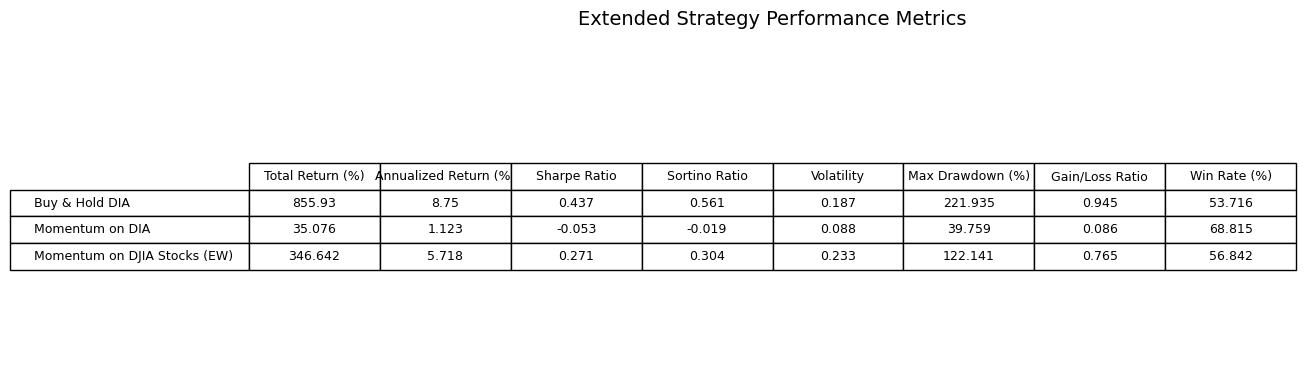

In [8]:
from scipy.stats import skew, kurtosis

# Extended metrics function
def calculate_metrics(returns):
    cumulative_return = (1 + returns).prod() - 1
    annualized_return = (1 + cumulative_return) ** (252 / len(returns)) - 1
    sharpe_ratio = (returns.mean() - rf_daily["RF"].mean()) / returns.std() * np.sqrt(252)
    volatility = returns.std() * np.sqrt(252)
    max_drawdown = ((1 + returns).cumprod().cummax() - (1 + returns).cumprod()).max()

    downside_std = returns[returns < 0].std()
    sortino_ratio = (returns.mean() - rf_daily["RF"].mean()) / downside_std * np.sqrt(252) if downside_std != 0 else np.nan

    gains = returns[returns > 0]
    losses = -returns[returns < 0]
    gain_loss_ratio = gains.mean() / losses.mean() if not losses.empty else np.nan

    win_rate = (returns > 0).mean() * 100

    return {
        "Total Return (%)": cumulative_return * 100,
        "Annualized Return (%)": annualized_return * 100,
        "Sharpe Ratio": sharpe_ratio,
        "Sortino Ratio": sortino_ratio,
        "Volatility": volatility,
        "Max Drawdown (%)": max_drawdown * 100,
        "Gain/Loss Ratio": gain_loss_ratio,
        "Win Rate (%)": win_rate,
    }

# Apply metrics to all strategies
metrics = {
    "Buy & Hold DIA": calculate_metrics(aligned_dia["DIA_Return"]),
    "Momentum on DIA": calculate_metrics(dia_data["Strategy2_Return"]),
    "Momentum on DJIA Stocks (EW)": calculate_metrics(strategy3_returns["Strategy3_Return"]),
}

# Create DataFrame and round
metrics_df = pd.DataFrame(metrics).T.round(3)
print(metrics_df)

# === Plot the metrics table ===
fig, ax = plt.subplots(figsize=(14, 4))  # wider for more columns
ax.axis('off')
table = ax.table(cellText=metrics_df.values,
                 colLabels=metrics_df.columns,
                 rowLabels=metrics_df.index,
                 cellLoc='center',
                 loc='center')
table.auto_set_font_size(False)
table.set_fontsize(9)
table.scale(1.3, 1.5)
plt.title("Extended Strategy Performance Metrics", fontsize=14, pad=20)
plt.tight_layout()
plt.show()